# 42621 Final_Data_ngodarpan.gov.in 


In [63]:
import boto3
import numpy as np 
import pandas as pd
import datetime as dt
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
from collections import Counter
import statistics
import re
#from langdetect import detect

# Suppress loc warnings
pd.options.mode.chained_assignment = None

In [64]:
client = boto3.client('s3')
resource = boto3.resource('s3')
my_bucket = resource.Bucket('my-bucket')

In [65]:
df = pd.read_excel("42621 Final_Data_ngodarpan.gov.in.xlsx")

In [66]:
df.head()

,Name,ngo url,Mobile,UniqueID,Off phone1,Email,Major Activities1,operational states db,issues working db,operational district db,...,Asisstant Secretary mobile,Board Member name,Board Member email,Board Member mobile,Vice Chairman name,Vice Chairman email,Vice Chairman mobile,Member name,Member email,Member mobile
0,PRAYAS,NaN,9.778080e+09,OR/2009/0010000,06858-223440,director_prayas@yahoo.com,1.63 Nos. of SHGs formed,"ORISSA,","Agriculture,Children,Civic Issues,Disaster Man...","ORISSA->Nabarangapur ,",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,PONDICHERRYWOMENSCONFERENCE,NaN,9.443253e+09,PY/2016/0100001,0413-2213238,surebe33@gmail.com,Working for Women and Children Obtaining Loan ...,"PUDUCHERRY,","Women's Development & Empowerment,Children,","PUDUCHERRY->Puducherry,",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SHABRI SAMAJ SEWA SAMITI,http://ssssamitibhind.org,7.828394e+09,MP/2016/0100003,0751-1234689,ssssamitibhind@gmail.com,more than one thousand leadership development ...,"MADHYA PRADESH,","Animal Husbandry, Dairying & Fisheries,Agricul...","MADHYA PRADESH->Anuppur, Ashoknagar, Balaghat,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ALOK,ssssamitibhind@gmail.com,7.828498e+09
3,ANAND GANGA SAMAJIK SIKSHA SAMITI,NaN,9.450678e+09,UP/2016/0100004,05566-281059,lovelyraivijendra@gmail.com,OUR ORGANISATION HAVE PLANTED MORE THAN 2 LAKH...,"UTTAR PRADESH,","Agriculture,Environment & Forests,Health & Fam...","UTTAR PRADESH->Deoria, Gorakhpur, Sant Kabir N...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Himaliyan Gram Vikas Samiti,NaN,9.412037e+09,UA/2016/0100009,05964-213271,hgvs1990@gmail.com,Facilitated formation and strengthening of 65C...,"UTTARAKHAND,","Animal Husbandry, Dairying & Fisheries,Agricul...","UTTARAKHAND->Almora , Bageshwar, Champawat, Pi...",...,NaN,Krishna Nand,hgvsgan@yahoo.co.in,7.500720e+09,Leela Dhar Joshi,hgvs.jleeladhar.lj@gmail.com,8.057816e+09,NaN,NaN,NaN


## 1. About this dataset
**Data provided by:** NGO Darpan  
**Source:** s3://daanmatchdatafiles/Darpan21FCRA/42621 Final_Data_ngodarpan.gov.in.xlsx  
**Type:** xlsx  
**Last Modified:** June 1, 2021, 17:06:30 (UTC-07:00)  
**Size:** 49.7 MB

## 2. What's in this dataset?

In [67]:
print("Shape:",df.shape)
print("Rows:",df.shape[0])
print("Columns:",df.shape[1])
print("Each row is a NGO")

Shape: (111929, 42)
Rows: 111929
Columns: 42
Each row is a NGO


## 3. Codebook

In [68]:
df_columns = [column for column in df.columns]
df_description = ["Name of NGO",
                "URL for NGO",
                "Mobile phone",
                "Unique ID of VO/NGO",
                "Telephone/Alternate number",
                "Email address",
                "Description of major activities",
                "List of states or union territories they operate in.",
                "List of issues they are working on",
                "List of districts they operate in",
                "Name of registrar",
                "FCRA number",
                "Registration number",
                "Address",
                "Name of NGO",
                "Registration date",
                "Name of Act",
                "City of NGO",
                "Type of NGO. Either registerd societies, trust, etc.",
                "Name of state",
                "Status",
                "President name",
                "President email",
                "President mobile",
                "Chairman name",
                "Chairman email",
                "Chairman mobile",
                "Secretary name",
                "Secretary email",
                "Secretary mobile",
                "Asisstant Secretary name",
                "Asisstant Secretary email",
                "Asisstant Secretary mobile",
                "Board Member name",
                "Board Member email",
                "Board Member mobile",
                "Vice Chairman name",
                "Vice Chairman email",
                "Vice Chairman mobile",
                "Member name",
                "Member email",
                "Member mobile"
               ]
df_dtypes = [dtype for dtype in df.dtypes]
df_unique = [u_count for u_count in df.nunique()]
df_count = [count for count in df.count()]
df_null_count = [df[null].isna().sum() for null in df_columns]

data = {"Column Name": df_columns, "Description": df_description, "Type": df_dtypes,\
        "Unique": df_unique, "Count":df_count, "Null":df_null_count}
codebook = pd.DataFrame(data)
codebook

,Column Name,Description,Type,Unique,Count,Null
0,Name,Name of NGO,object,109682,111929,0
1,ngo url,URL for NGO,object,24252,25787,86142
2,Mobile,Mobile phone,float64,111430,111897,32
3,UniqueID,Unique ID of VO/NGO,object,111929,111929,0
4,Off phone1,Telephone/Alternate number,object,15363,16527,95402
5,Email,Email address,object,111557,111929,0
6,Major Activities1,Description of major activities,object,77880,84618,27311
7,operational states db,List of states or union territories they opera...,object,3612,88890,23039
8,issues working db,List of issues they are working on,object,47787,89292,22637
9,operational district db,List of districts they operate in,object,24209,88890,23039


## 4. Columns

### Name (Name of NGO)

In [164]:
big_ngo_series = pd.Series(df["Name"].value_counts()).loc[lambda x : (x > 1)] 
big_ngo_dataframe = pd.DataFrame(big_ngo_series).rename(columns={"Name": "Count"})
big_ngo_dataframe

,Count
CATHOLIC CHURCH,25
RURAL DEVELOPMENT SOCIETY,20
Rural Development Society,11
INDIAN RED CROSS SOCIETY,11
RAMAKRISHNA MISSION,10
...,...
SHREYA FOUNDATION,2
WISDOM EDUCATIONAL TRUST,2
ADITYA SEVA SANSTHAN,2
EXCELLENCE ACADEMY,2


There are 1548 NGO(s) that has more than 2 records. Although there are many duplicate NGO(s), they have different "Major Activities1","operational states db" etc.

### ngo url

In [72]:
ngo_url = df["ngo url"]
ngo_url

0                                  NaN
1                                  NaN
2            http://ssssamitibhind.org
3                                  NaN
4                                  NaN
                      ...             
111924                         http://
111925                             NaN
111926         http://mathuravikas1977
111927                             NaN
111928    http:/www.srijansansthan.com
Name: ngo url, Length: 111929, dtype: object

In [81]:
# count the total number of invalid ngo url
invalid_url_count = sum(ngo_url.isnull())
invalid_url_count

86142

In [94]:
counter = dict(Counter(ngo_url))
duplicates = { key:[value] for key, value in counter.items() if value > 1}

duplicate_urls = pd.DataFrame.from_dict(duplicates)
duplicate_urls = duplicate_urls.melt(var_name="Duplicate urls", value_name="Count")\
                .sort_values("Count", ascending=False).reset_index(drop=True)
duplicate_urls.head()

,Duplicate urls,Count
0,NaN,86142
1,http://,859
2,https://ngodarpan.gov.in/index.php/ngo/primaryngo,159
3,https://ngodarpan.gov.in,57
4,http://ngodarpan.gov.in/index.php/ngo/primaryngo,56


According to the dataframe shown above, in addition to 86142 invalid ngo urls(NaN), there also exists many incorrect urls such as "http://", the url end with ".in", "http://NA","https://mail.google.com/mail/u/0/#inbox" and so on.

This means many ngos encounter some difficulties to fill out their url in the form. They don't know which link is the correct one. (Personal guess: some of the NGOs don't have their website so they put NaN)

### Major Activities1

In [141]:
major_activities = df["Major Activities1"]

# Drop invalid value and convert them to the lower case
major_activities = major_activities.dropna().str.lower()

# Count the number of each duplicate major activities
counter = dict(Counter(major_activities))
dup_activities = { key:[value] for key, value in counter.items() if value > 1}

major_ac_df = pd.DataFrame.from_dict(dup_activities)
major_ac_df = major_ac_df.melt(var_name="Duplicate Major Activities", value_name="Count").sort_values("Count", ascending=False).reset_index(drop=True)
major_ac_df.head(3)

,Duplicate Major Activities,Count
0,education,459
1,social work,334
2,relief to poor medical help help for aged and ...,263


The top 3 major activities that NGOs are doing are education, social work, and relief to the poor medical help. This demonstrates the major social problems that government doesn't pay much more attention to, especially the problem related to inequity in educational opportunity.

### reg name (Name of registrar)

In [156]:
reg_name = df["reg name"]
# Assign the original index to a series and convert it to the DataFrame
reg_name_count = pd.DataFrame(reg_name.value_counts().reset_index()).rename(columns={"index":"Reg name",\
                 "reg name":"Count"})
reg_name_count

,Reg name,Count
0,Registrar of Societies,63561
1,Sub-Registrar,20388
2,Charity Commissioner,16849
3,Any Other,5093
4,Registrar of Companies,4477
5,Registrar of Cooperative Societies,1448
6,International Organisation,113


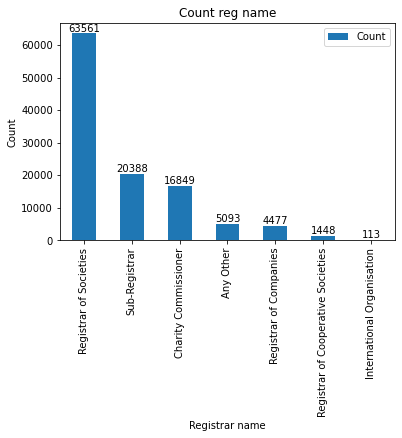

In [165]:
# plot the the bar chart show the number of each category ("Reg name")
bar_chart = reg_name_count.plot.bar(x="Reg name", y="Count")
for container in bar_chart.containers:
    bar_chart.bar_label(container)
plt.title("Count reg name")
plt.xlabel("Registrar name")
plt.ylabel("Count")
plt.show()